# 0. 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
#mpl.rcParams.update({"figure.constrained_layout.use": True})

#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper") 
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("Set2") 
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid") 

In [2]:
# 로컬에서(Window) 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [3]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("missingno: ", msno.__version__)
print("matplotlib: ", mpl.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
missingno:  0.5.1
matplotlib:  3.6.2


# 1. 데이터 불러오기

In [4]:
# 데이터를 불러올 때 Dtype 설정하기

df = pd.read_csv("../data/train.csv", 
                 encoding="utf-8", 
                 index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
def age_categorize(age):
    if age < 20:
        age = 10
    elif 20 <= age < 90:
        age = (age//10)*10
    return age

In [7]:
df["age_category"] = df["Age"].apply(age_categorize).astype("category")

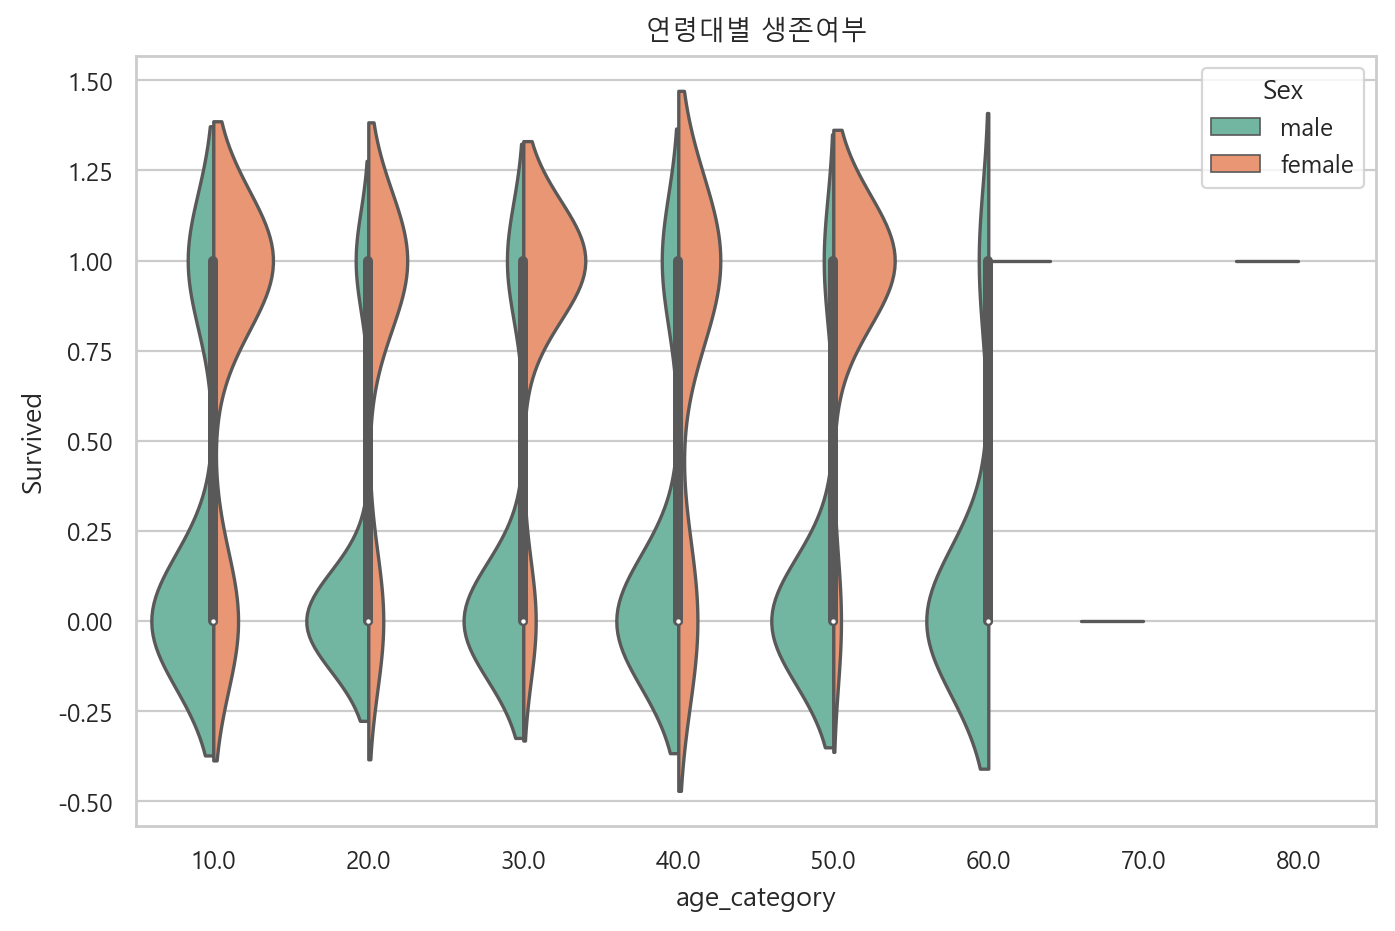

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

feature = "Survived"
sns.violinplot(data = df,
               x = "age_category",
               y = feature,
               hue = "Sex",
               split = True,
               ax = ax);
ax.set_title("연령대별 생존여부");

In [9]:
df.groupby(["age_category", "Sex","Survived"]).agg("size")

age_category  Sex     Survived
10.0          female  0            22
                      1            53
              male    0            63
                      1            26
20.0          female  0            20
                      1            52
              male    0           123
                      1            25
30.0          female  0            10
                      1            50
              male    0            84
                      1            23
40.0          female  0            10
                      1            22
              male    0            45
                      1            12
50.0          female  0             2
                      1            16
              male    0            26
                      1             4
60.0          female  0             0
                      1             4
              male    0            13
                      1             2
70.0          female  0             0
                   

In [10]:
age_femal_dead = df.groupby(["age_category", "Sex","Survived"]).agg("size").values[::4]
age_femal_surv = df.groupby(["age_category", "Sex","Survived"]).agg("size").values[1::4]
age_male_dead = df.groupby(["age_category", "Sex","Survived"]).agg("size").values[2::4]
age_male_surv = df.groupby(["age_category", "Sex","Survived"]).agg("size").values[3::4]

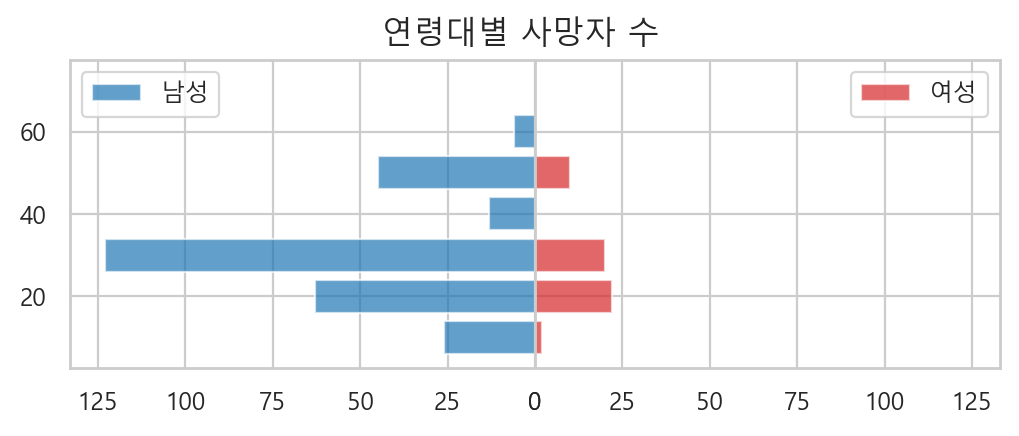

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 2) ,gridspec_kw={"wspace":0})
axes[0].barh(df["age_category"].unique()[:-1], 
            age_male_dead, color="tab:blue", height=8, label="남성", alpha = 0.7)
axes[1].barh(df["age_category"].unique()[:-1], 
            age_femal_dead, color="tab:red",height=8, label="여성", alpha = 0.7)

xmax = age_male_dead.max()+10
axes[0].set_xlim(xmax, 0)
axes[0].legend()
axes[1].set_xlim(0, xmax)
axes[1].legend()
fig.suptitle("연령대별 사망자 수");

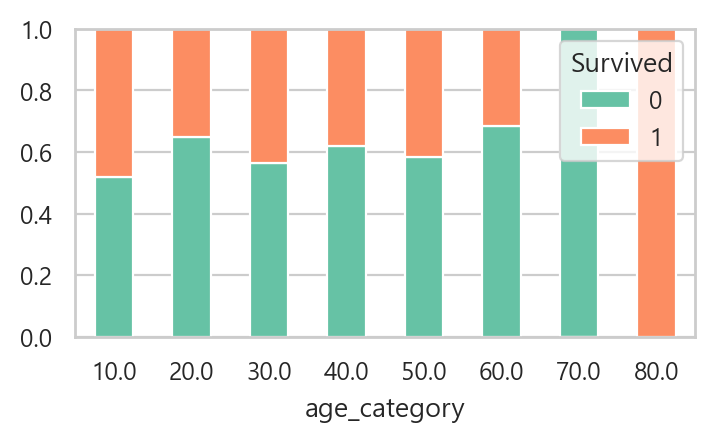

In [12]:
fig, ax = plt.subplots(figsize=(4,2))

pd.crosstab(df["age_category"], 
            df["Survived"], 
            normalize="index").plot(kind = "bar", stacked=True, rot=0, ax=ax)

ax.set_ylim(0,1);

# 5월 23일 과제

1. 오늘 배운 내용을 바탕으로 titanic 데이터를 재시각화 하시오.